In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [6]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data import load_cell_cycle_data

out_dir = 'output/cell_cycle_24x128_random_orfs_simple_hybrid_20220610_156a'
config_path = f'{out_dir}/config'

config = importlib.import_module(f"{config_path.replace('/', '.')}")
vit = load_model_config(config)
vit_data = load_cell_cycle_data()

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

In [10]:
trainer = ViTTrainer(vit, 'cell_cycle_24x128_random_orfs_simple_hybrid_20220610_156a',
                     dataloader, resume=True, resume_path=out_dir)

In [11]:
trainer.setup()

Resuming from 21480...


In [12]:
trainer.compute_predictions_losses()

In [13]:
print(trainer.perf_str)

Loss:
  Train:	0.382
  Valid:	0.386
  Test: 	0.386

R2:
  Train:	0.628
  Valid:	0.595
  Test: 	0.522


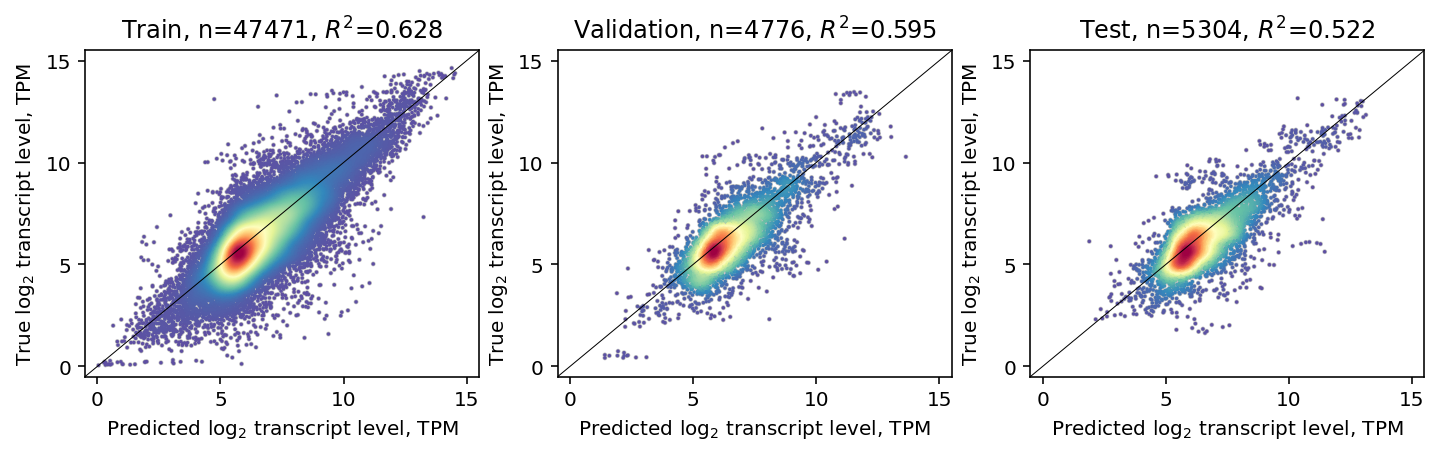

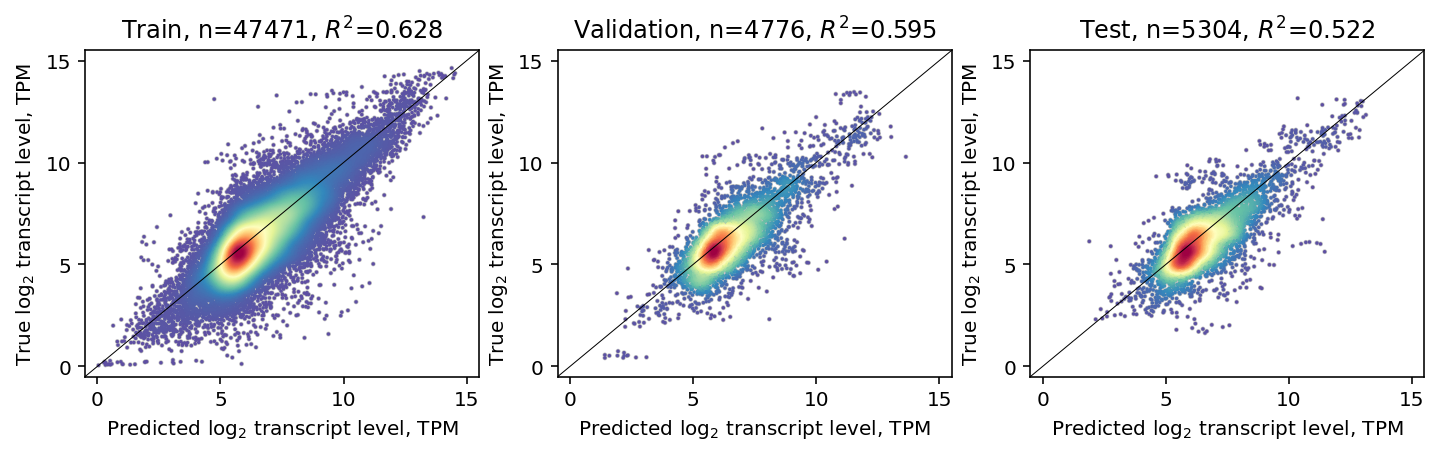

In [14]:
trainer.plot_predictions()

In [34]:
dataloader.save_indices('output/cell_cycle_24x128_random_orfs_simple_hybrid_20220610_156a/indices.csv')

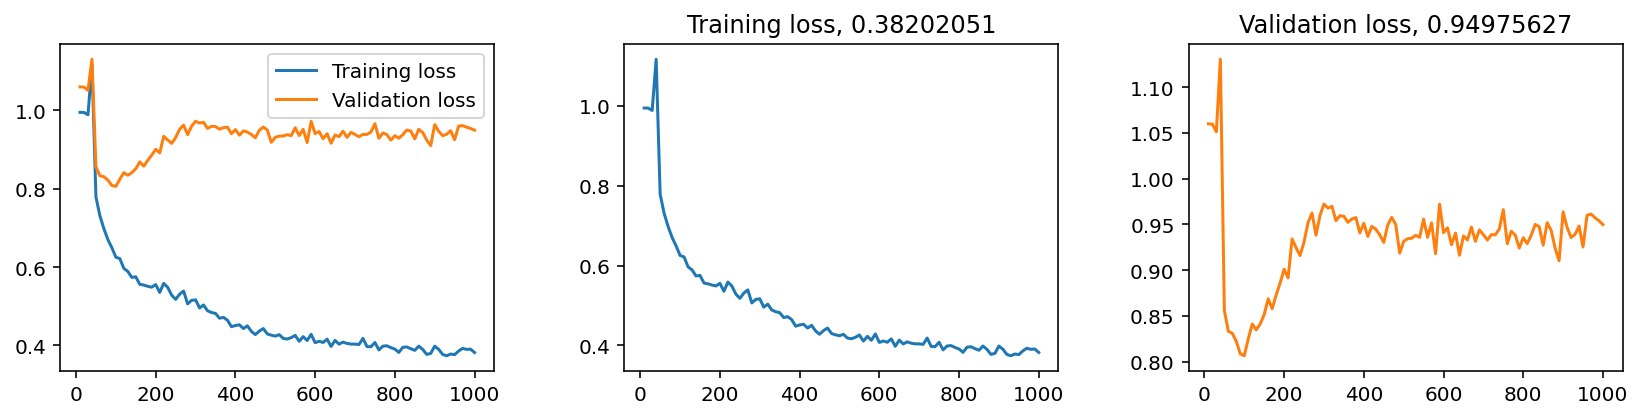

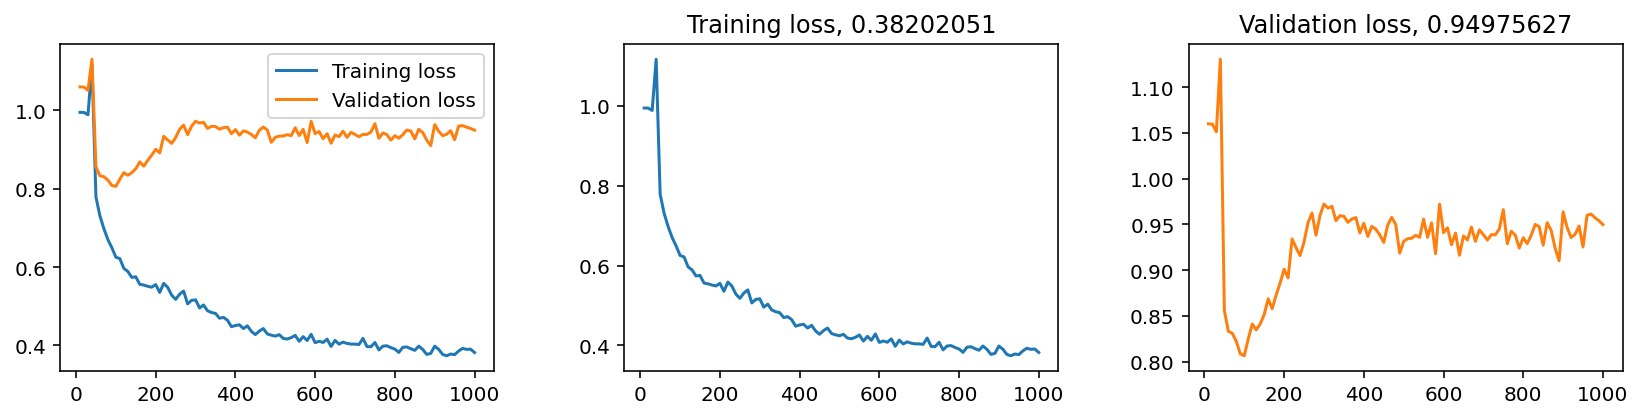

In [42]:
from src.vit_train import plot_loss_progress

loss_df = pd.read_csv(trainer.loss_path)

plot_loss_progress(loss_df.head(100), 100)

In [96]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()


0

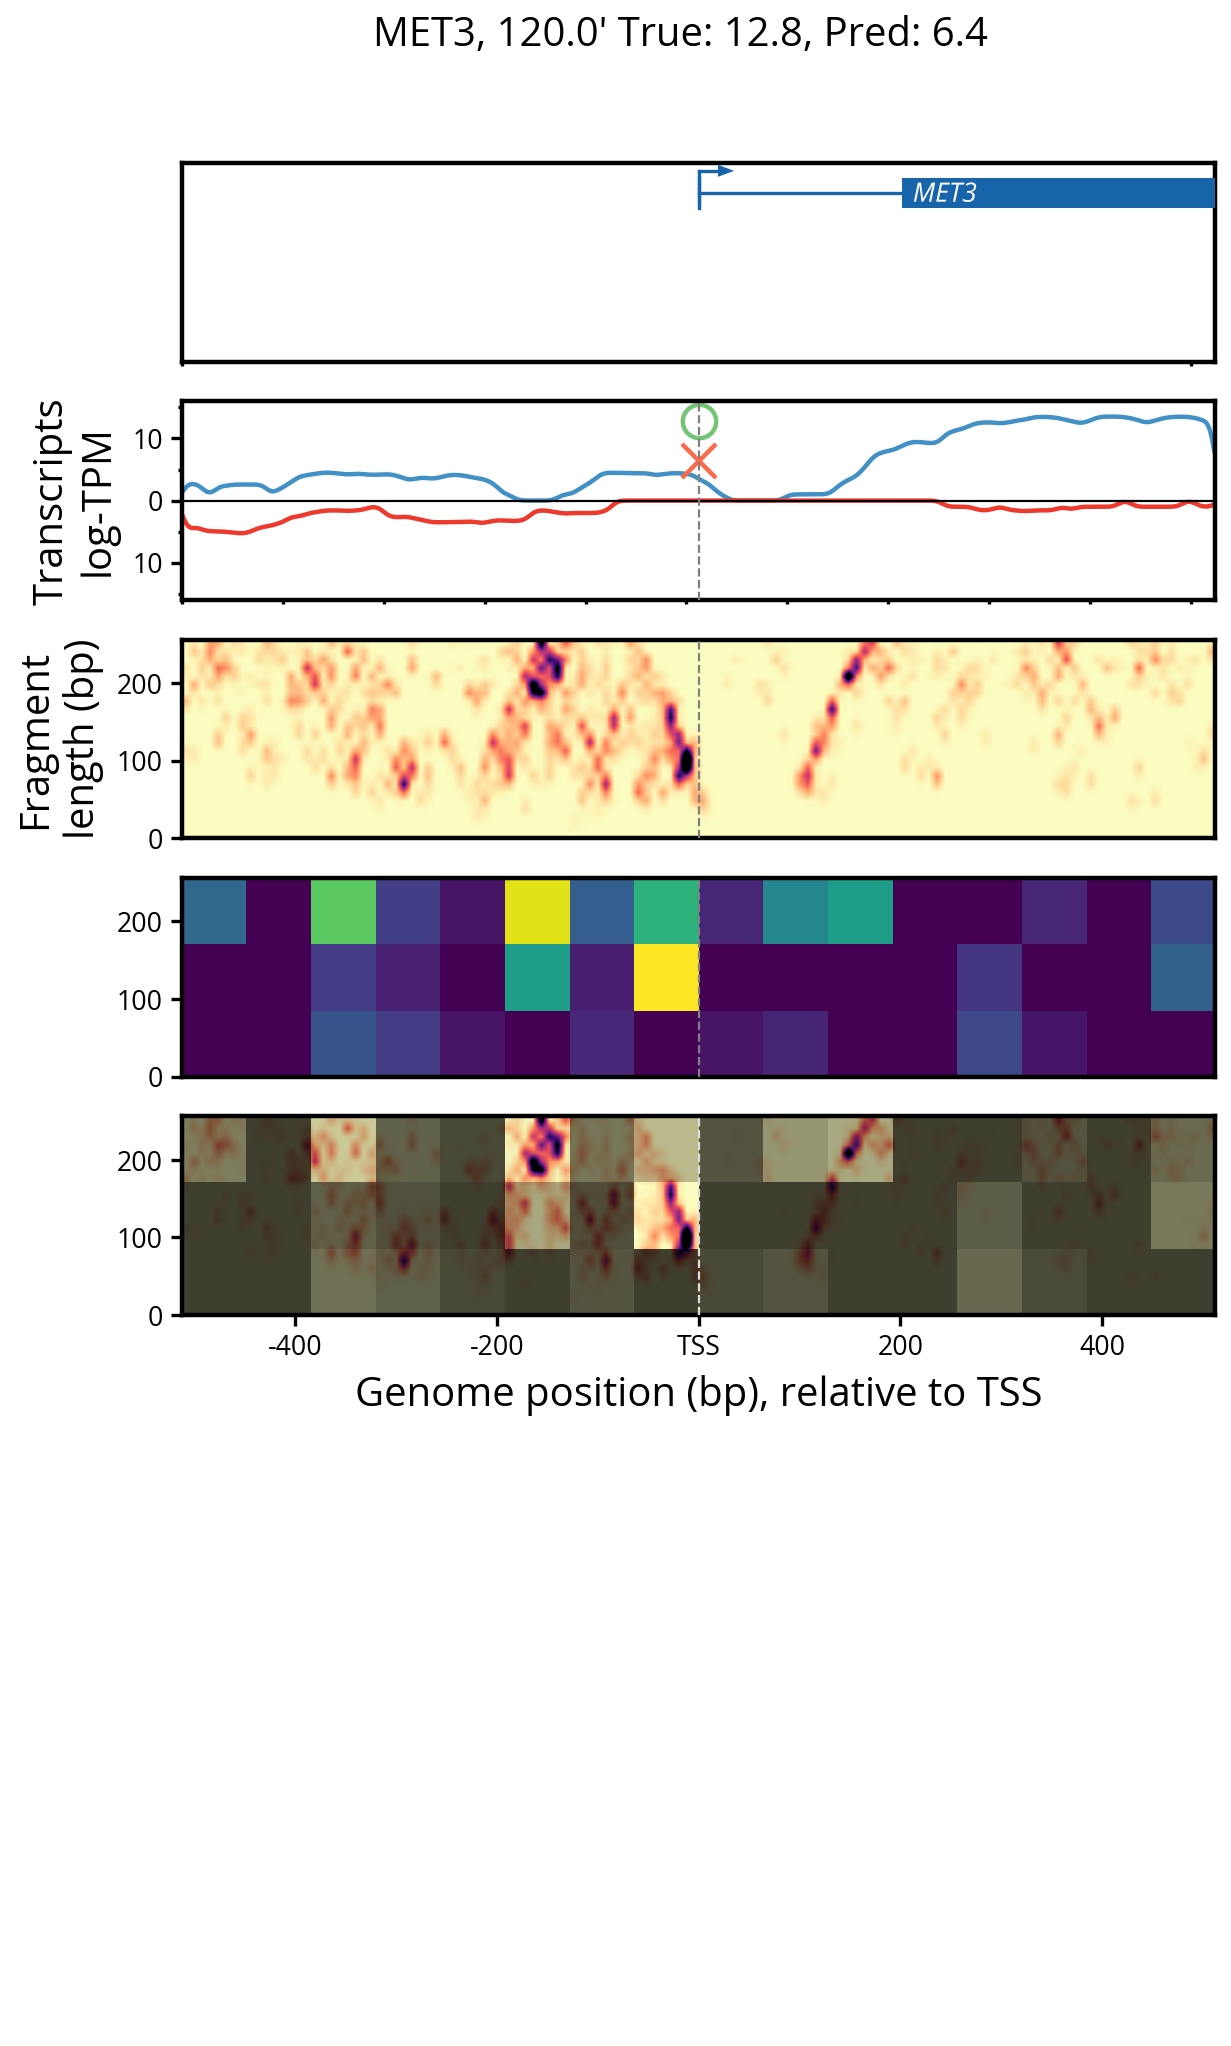

In [97]:
from src.vit_viz import plot_gene_prediction

plot_gene_prediction('MET3', 120.0, trainer.vit, trainer.dataloader.dataset,
    orf_plotter=orf_plotter, rna_plotter=rna_plotter)
0

In [87]:
from src.vit_data import load_cd_data_24x128

vit_data  = load_cd_data_24x128()

In [99]:
loss_df = pd.read_csv('output/complex_24x128_120_20220526_cf53/loss.csv')
loss_df.head()

,epoch,train_loss,validation_loss,debug_train,debug_valid,debug_test
0,10,1.020483,0.981446,1.018902,0.981318,0.925112
1,20,1.019321,0.981310,1.018632,0.981499,0.924843
2,30,1.018875,0.981141,1.018613,0.981477,0.924664
3,40,1.018471,0.981221,1.018572,0.981402,0.924801
4,50,1.018231,0.981416,1.018716,0.981446,0.924941


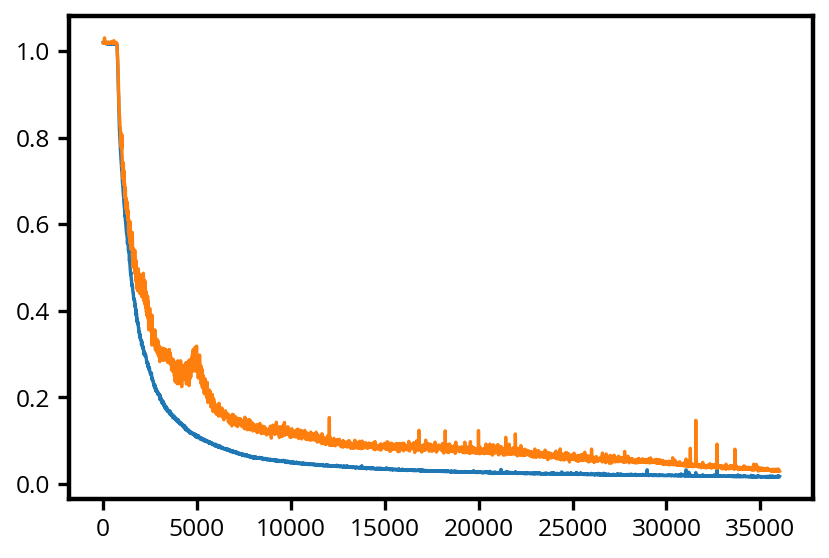

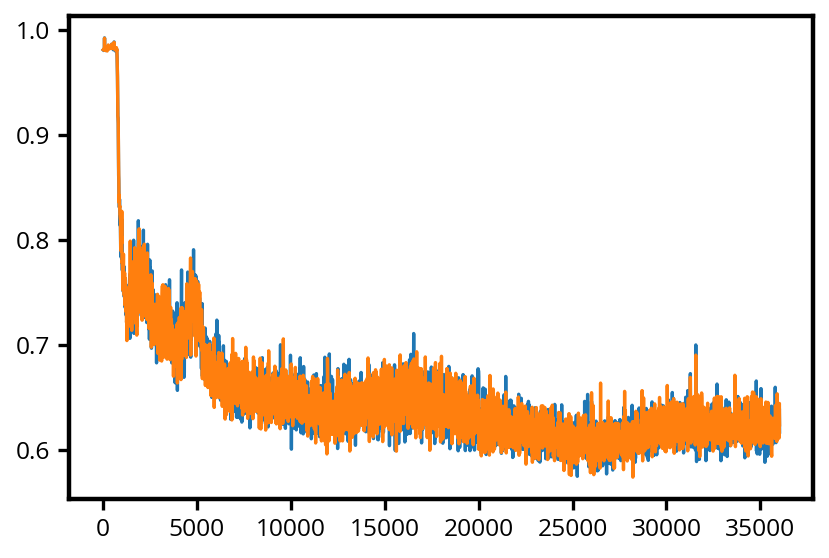

In [102]:
plt.plot(loss_df.epoch, loss_df.train_loss)
plt.plot(loss_df.epoch, loss_df.debug_train)
plt.show()

plt.plot(loss_df.epoch, loss_df.debug_valid)
plt.plot(loss_df.epoch, loss_df.validation_loss)